In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)

In [3]:
'''
somehow we need to get RNA data...
'''
from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnafold import rnafold_to_eden

def rfam_uri(family_id):
    return '%s.fa'%(family_id)
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)


def get_graphs(rfam_id = 'RF00005'):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    graphs = rnafold_to_eden(seqs, shape_type=5, energy_range=30, max_num=3)
    return graphs


In [4]:
'''
first we test the core/interface extractor

**later**
'''


'\nfirst we test the core/interface extractor\n\n**later**\n'

In [10]:
%%time
'''
second is reading a grammar and training an estimator
'''
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.ubergraphlearn as ul
import itertools

# learn a grammar
graphs = get_graphs()
graphs = itertools.islice(graphs,200)

sampler=ul.UberSampler(radius_list=[0,1],
                       thickness_list=[2], 
                       min_cip_count=2,
                       min_interface_count=3)

sampler.fit(graphs,n_jobs=4,batch_size=3)

sampler.save('tmp/rna_ubergrammar.ge')

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476
fitting was asked with n=1

Classifier:
SGDClassifier(alpha=1.81326330602e-05, average=False, class_weight=None,
       epsilon=0.1, eta0=0.626475144782, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=34, n_jobs=1,
       penalty='elasticnet', power_t=0.815580375404, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 200  #interfaces: 87   #cores: 227   #core-interface-pairs: 472
Saved model: tmp/rna_ubergrammar.ge
CPU times: user 38.5 s, sys: 6.16 s, total: 44.7 s
Wall time: 1min 36s


interface id: 874212 [37 options]


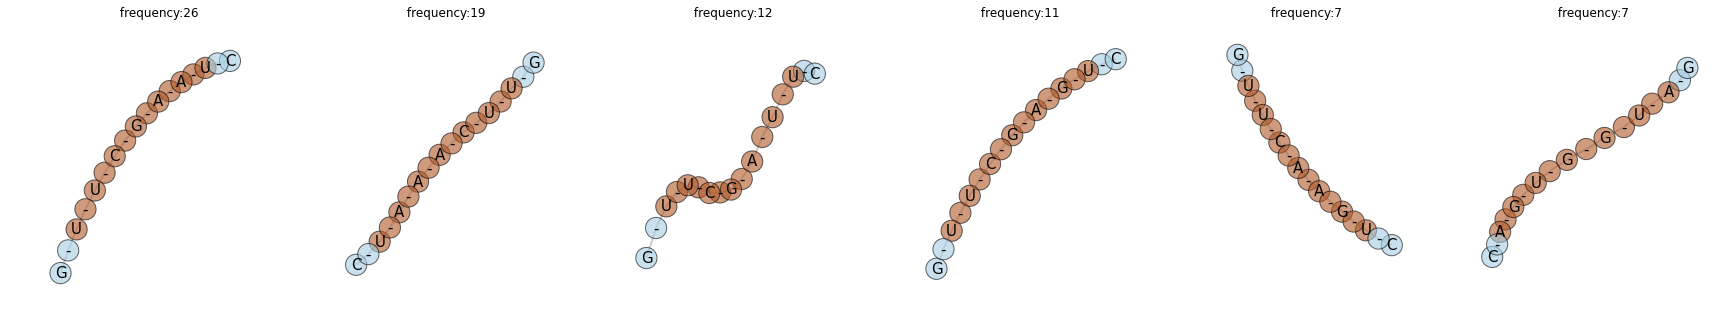

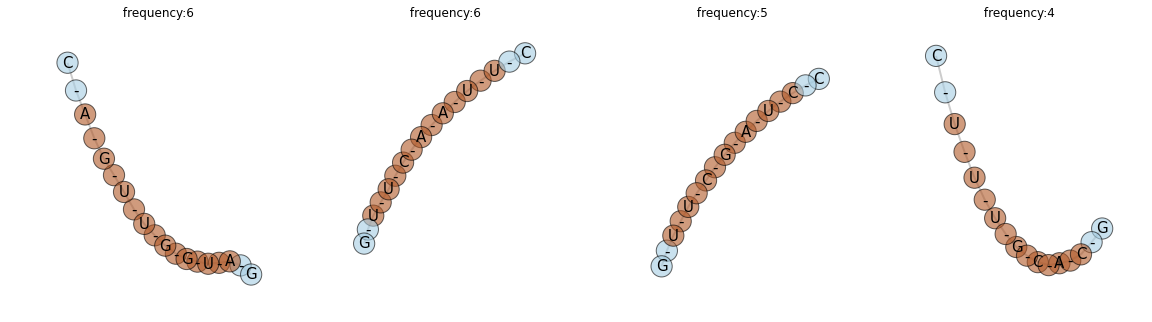

interface id: 78480 [25 options]


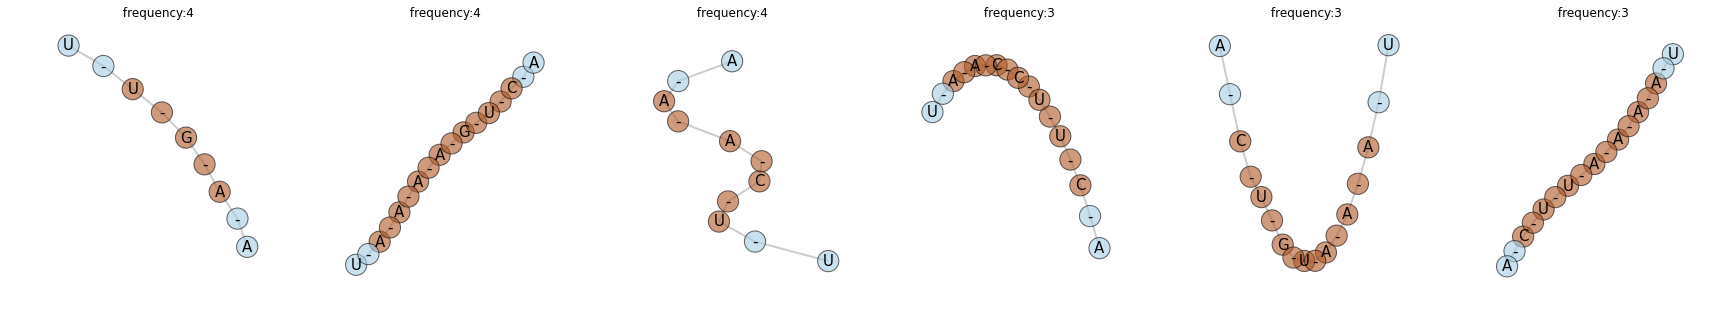

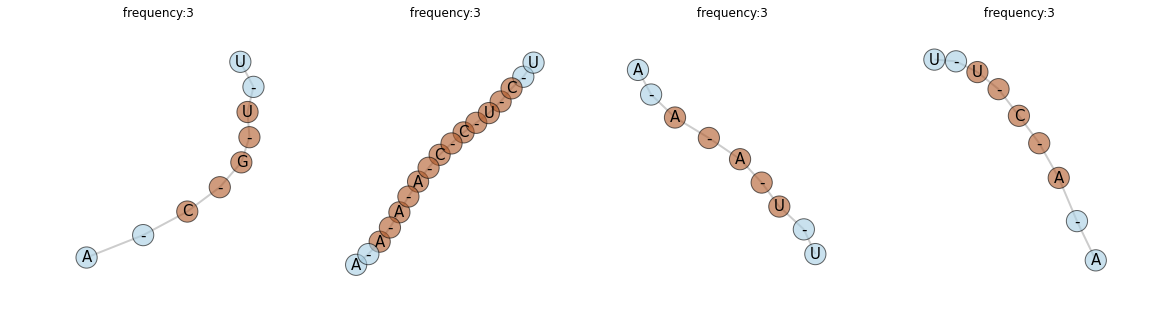

interface id: 461898 [20 options]


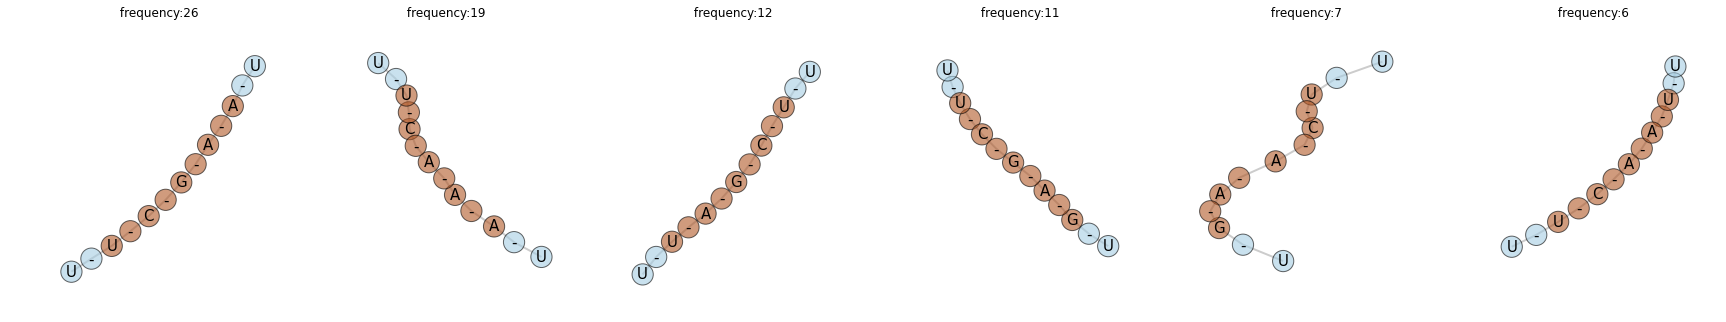

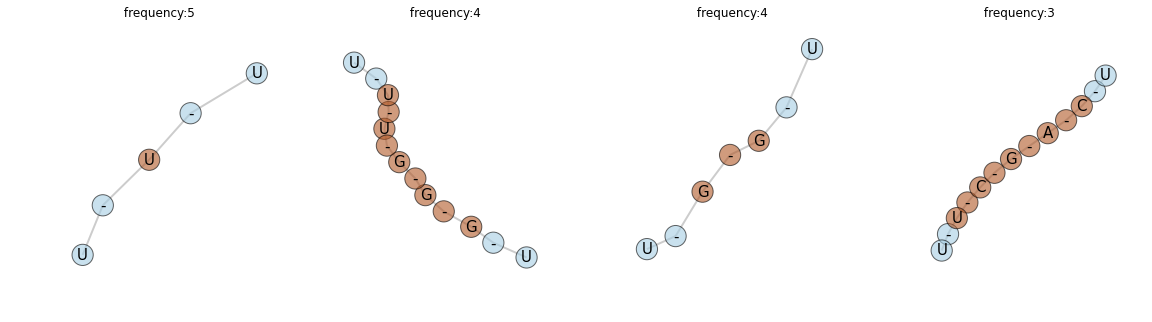

interface id: 382182 [16 options]


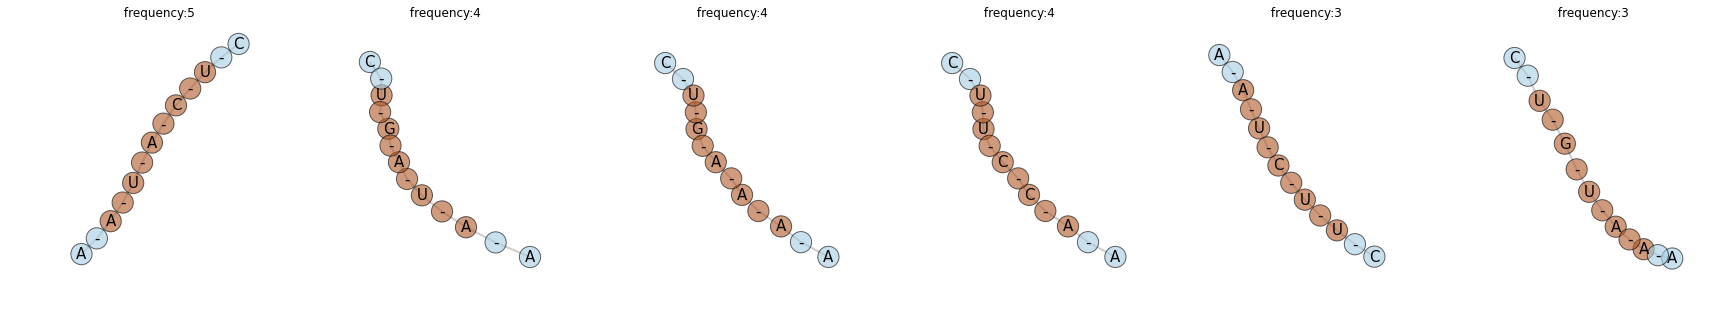

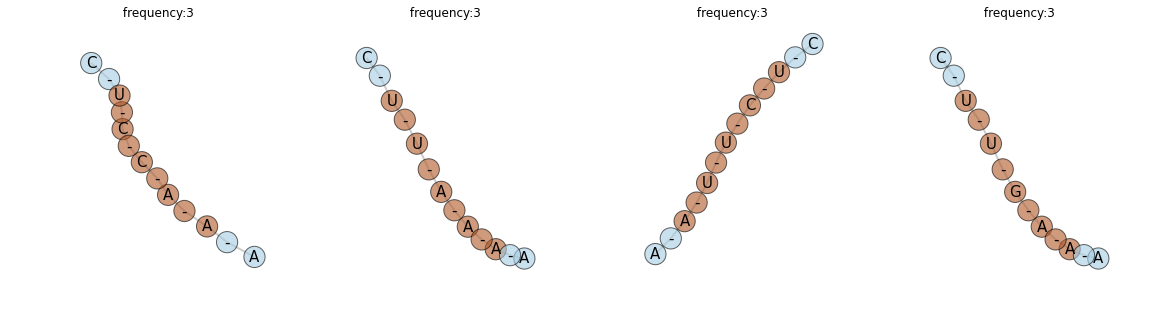

interface id: 84951 [14 options]


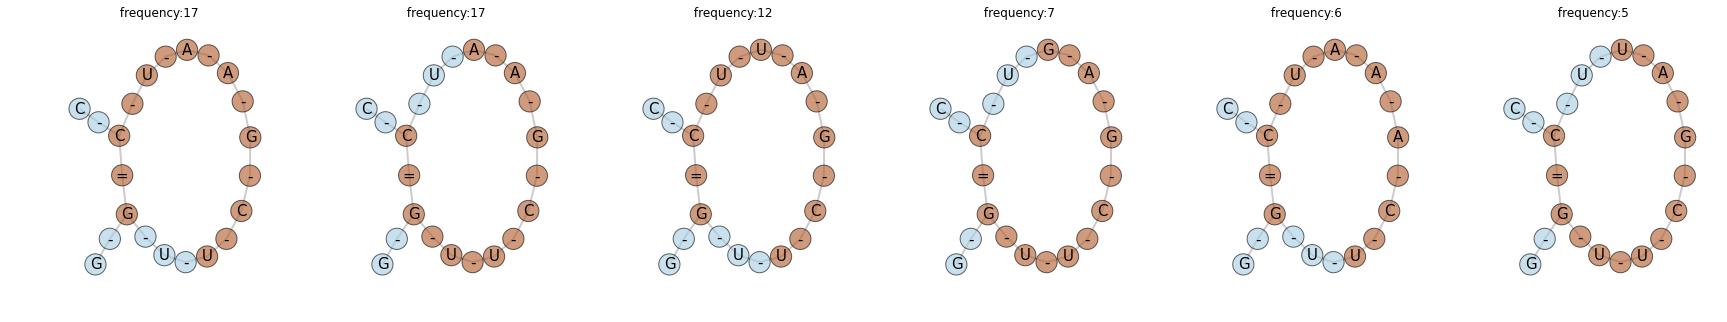

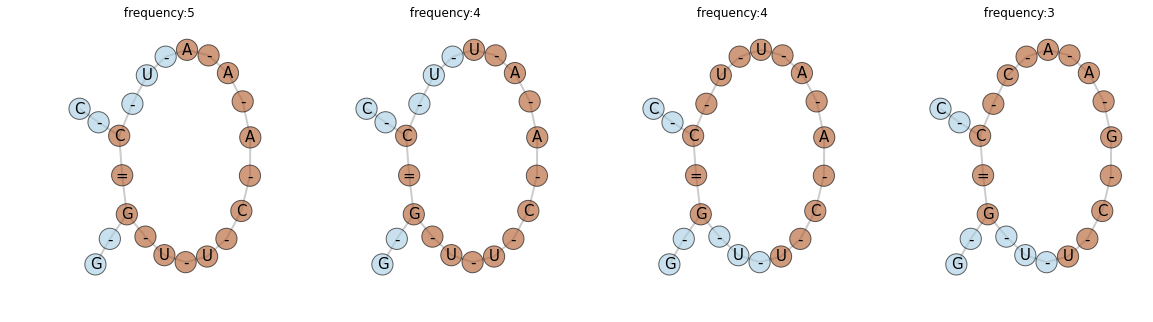

In [11]:
#draw production rules
myutils.draw_grammar(sampler.lsgg.productions,n_productions=5,
                     n_graphs_per_line=6, size=5, 
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

how often do we see interface hashes
# productions: 472
x = # interfaces (total: 87)
y=number of cores(ihash), y=sum Of Core Counts(ihash)


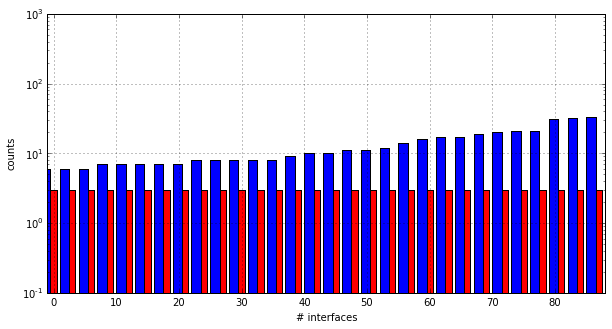

how often was this corehash seen?
x = # cores (total: 227)
y = in Y interfaces(chash), y= sum Of Count Over All Interfaces(chash)


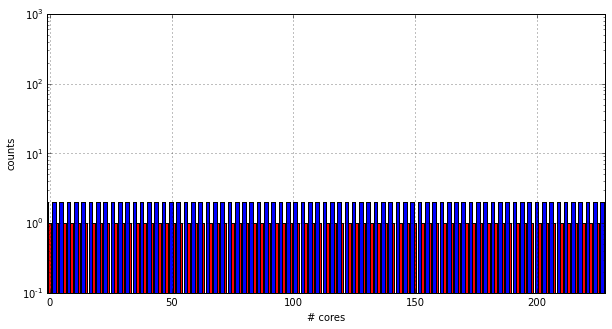

histogram
# productions: 472
distinct cores: 227 (seen on x axis)
interfaces with x many cores were observed y many times. 


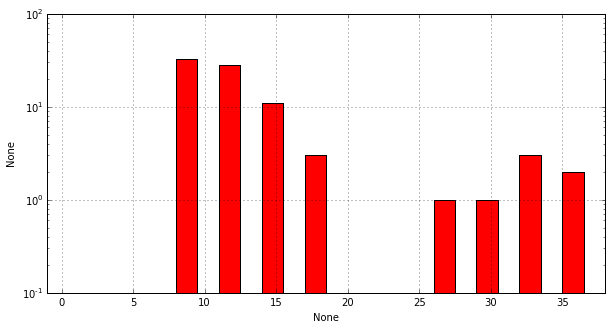

other histogram
how many cores exist with x many interfaces


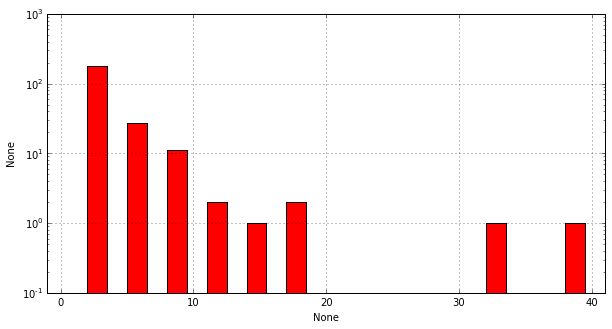

In [12]:
#grammar statistics
myutils.draw_grammar_stats(sampler.lsgg.productions, size=(10,5))

Loaded model: tmp/rna_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7fbfa6f53998>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fbfa6f53368>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: -1.0
improving_threshold: -1
keep_duplicates: False
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7fbf8580ded0>
max_core_size_diff: -2
    n_jobs: -1
   n_steps: 50
      nbit: 20
node_entity_check: <function <lambda> at 0x7fbf966445f0>
 omit_seed: True
postprocessor: <graphlearn.postprocessing.PostProcessor instance at 0x7fbfa7776d88>
probabilistic_core_choice: True
proposal_probability: False
quick_skip_orig_cip: False
radius_list: [0, 2]
random_state: None
sample_path: None
sampling_interval: 9
score_core_choice: False
selec

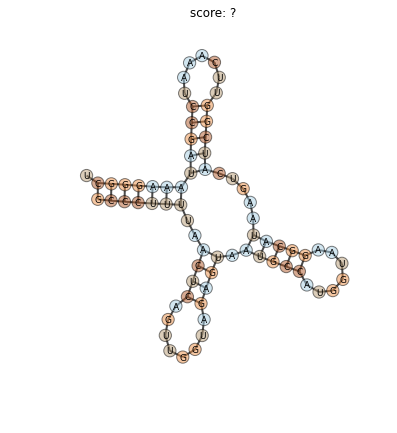

Graph id: 16


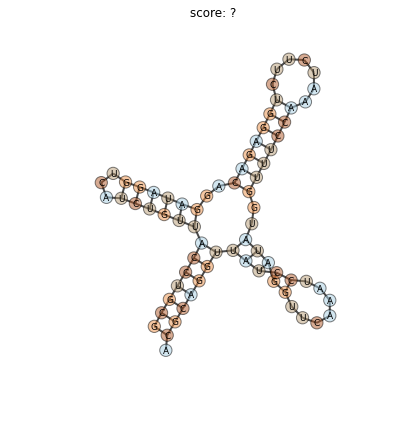

Graph id: 17
_propose_graph: iteration 0 ; core 0 of 11 ; original_cips tried  0


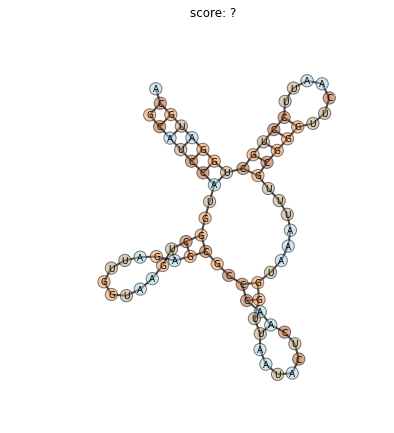

Graph id: 18
select_cip_for_substitution failed because no suiting interface was found,             extract failed 200 times; cip found but unacceptable:200 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 514, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 531, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 695, in select_original_cip
    extract failed %d times; cip found but unacceptable:%s ' % (failcount + nocip, failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found,             extract failed 200 times; cip found but unacceptable:200 



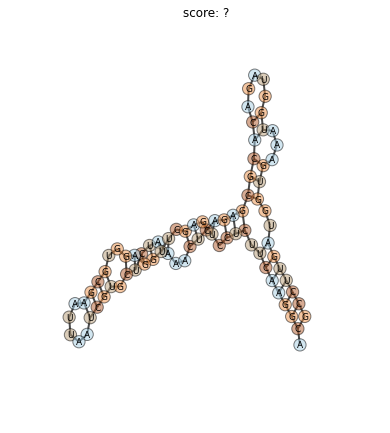

Graph id: 19


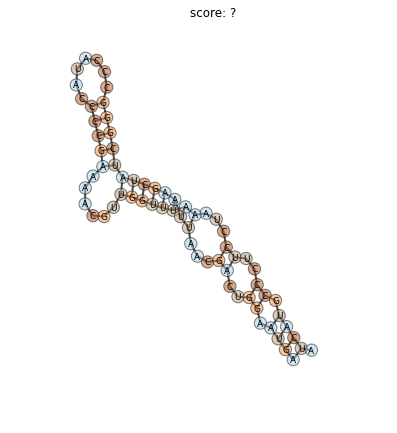

Graph id: 20
select_cip_for_substitution failed because no suiting interface was found,             extract failed 200 times; cip found but unacceptable:200 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 514, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 531, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 695, in select_original_cip
    extract failed %d times; cip found but unacceptable:%s ' % (failcount + nocip, failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found,             extract failed 200 times; cip found but unacceptable:200 



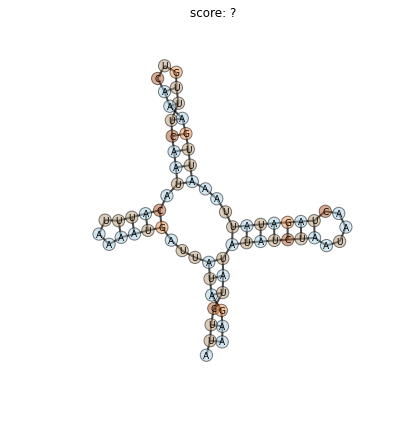

CPU times: user 6.91 s, sys: 2 s, total: 8.91 s
Wall time: 14.4 s


In [13]:
%%time
'''
Graph sampling
'''
%matplotlib inline

import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.ubergraphlearn as ul
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=ul.UberSampler()
sampler.load('tmp/rna_ubergrammar.ge')
graphs = get_graphs()

id_start=15
id_end=id_start+6
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50

graphs = sampler.sample(graphs,
                        n_samples=6,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=-1,
                        probabilistic_core_choice=True,
                        burnin=0,
                        select_cip_max_tries=200,
                        keep_duplicates=False)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=6, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=150,
                          headlinehook= myutils.get_score_of_graph
                          )

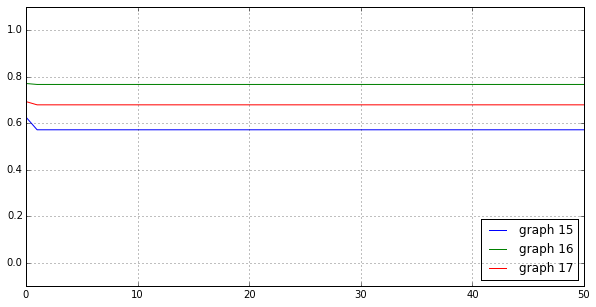

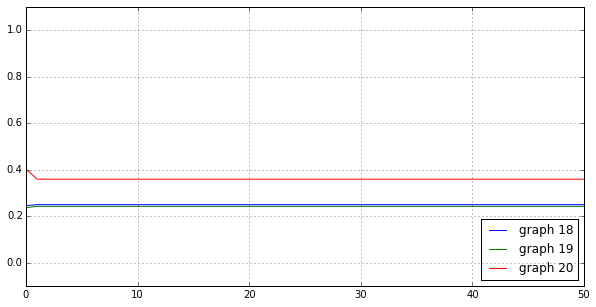

In [9]:
%matplotlib inline
from itertools import islice
import numpy as np

step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()